# Week 5
## Basic Statistics

### Importing Packages
We will need some standard packages. Some of these should have been installed with Anaconda 3.

In [1]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # plotting
import scipy                              # statistics
import statistics as stats                # statistics like the mode
from scipy.stats import norm              # fitting a Gaussian distribution

The dataset has X and Y coordinates,facies 1 and 2 (1 is sandstone and 2 interbedded sand and mudstone), porosity (fraction), permeability (mDarcy) and acoustic impedance (kg/m2s*10^6). We load it with the pandas 'read_csv' function into a data frame we called 'df' 

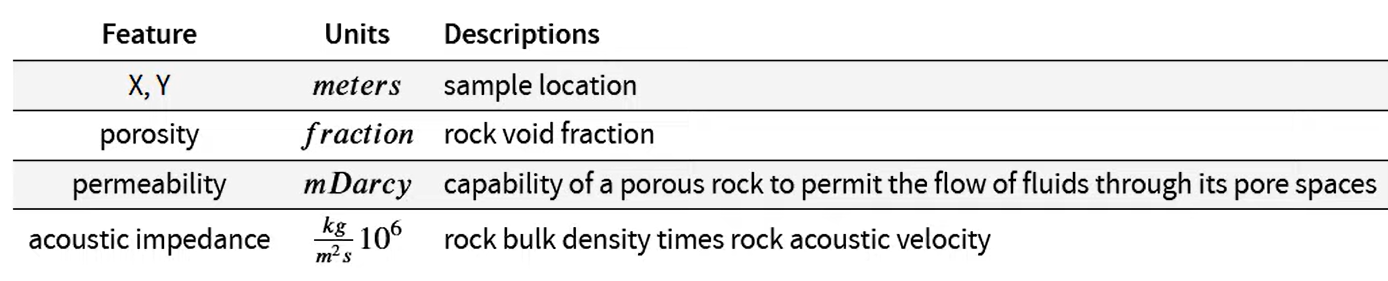

In [2]:
df = pd.read_csv("2D_MV_200wells.csv")                      # read a .csv file in as a DataFrame
#print(df.iloc[0:5,:])                                       # display first 4 samples in the table as a preview
df.head()                                                   # we could also use this command for a table preview 

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


Let's extract one of the features, porosity, into a 1D ndarray and do our statistics on porosity.

then we can use NumPy's statistics methods

In [3]:
por = df['porosity'].values

Now let's go through all the univariate statistics parameters
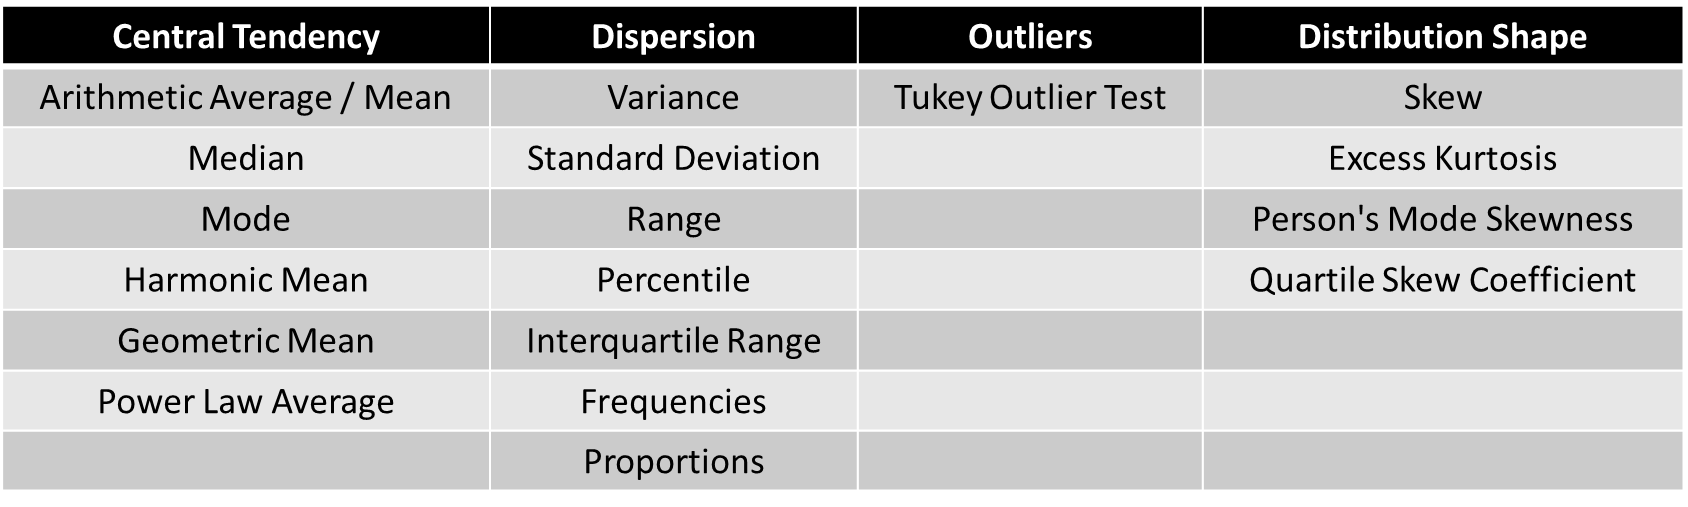    

Now let's go through all the univariate statistics listed above one-by-one.

#### Measures of Central Tendency

Let's start with measures of central tendency.

##### The Arithmetic Average / Mean

\begin{equation}
\overline{x} = \frac{1}{n}\sum^n_{i=1} x_i
\end{equation}

In [4]:
por_average = np.average(por)
print('Porosity average is ' + str(round(por_average,2)) + '.')

Porosity average is 0.15.


Text(0.14930005, 16, 'Mean')

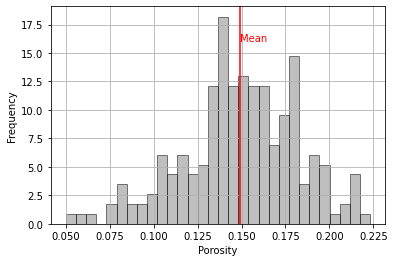

In [5]:
df_por=df['porosity']
df_por.plot.hist(alpha=0.5, bins=30, grid=True, legend=None, density=True, color='gray',edgecolor='black')
plt.xlabel('Porosity')
plt.axvline(x=por_average,color='r')
plt.text(por_average,16,'Mean',rotation=0,color='r')


##### The Weighted Arithmetic Average / Mean
Many of the following methods accept data weights, e.g. declustering.<br>
Takes into account the varying degrees of importance of the numbers in a data set.

\begin{equation}
\overline{x} = \frac{\sum^n_{i=1} \lambda_{i} x_i}{\sum^n_{i=1} \lambda_{i}}
\end{equation}

In [6]:
weights=np.ones(por.shape)
por_average = np.average(por,weights=weights)

print('Porosity weighted average/mean is ' + str(round(por_average,2)) + '.')

Porosity weighted average/mean is 0.15.


##### Median
A measure of central tendency that is know as "middle" value in a range of the data.<br>
For __odd number of observations__ the median is the middle value<br>
For __even number of observations__ the median is the average of the two middle values<br>
<br>
\begin{equation}
P50_x = F^{-1}_{x}(0.50)
\end{equation}

In [7]:
por_median = np.median(por)
print('Porosity median is ' + str(round(por_median,2)) + '.')

Porosity median is 0.15.


Text(0.15015, 18, 'Median')

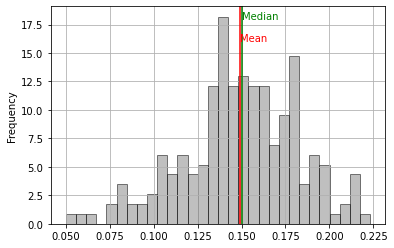

In [8]:
df_por.plot.hist(alpha=0.5, bins=30, grid=True, legend=None, density=True, color='gray',edgecolor='black')
plt.axvline(x=por_average,color='r')
plt.axvline(x=por_median,color='green')
plt.text(por_average,16,'Mean',rotation=0,color='r')
plt.text(por_median,18,'Median',rotation=0,color='green')

##### Mode

The most common value. The observation that appears most frequently. To do this we should bin the data, like into histogram bins/bars.  To do this we will round the data to the 2nd decimal place.  We are assume bin boundaries, $0.01, 0.02,\ldots, 0.30$.

In [9]:
por_mode = stats.mode(np.round(por,2))
print('Porosity mode is ' + str(round(por_mode,3)) + '.')

Porosity mode is 0.14.


Text(0.15015, 18, 'Median')

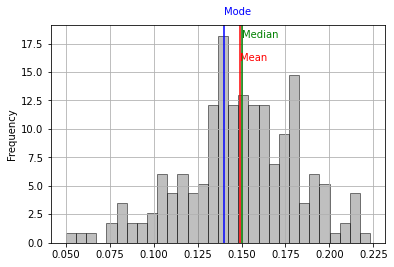

In [11]:
df_por.plot.hist(alpha=0.5, bins=30, grid=True, legend=None, density=True, color='gray',edgecolor='black')
plt.axvline(x=por_average,color='r')
plt.axvline(x=por_median,color='green')
plt.axvline(x=por_mode,color='blue')
plt.text(por_mode,20,'Mode',rotation=0,color='blue')
plt.text(por_average,16,'Mean',rotation=0,color='r')
plt.text(por_median,18,'Median',rotation=0,color='green')

##### Geometric Mean
- The Geometric Mean is a special type of average where we multiply the numbers together and then take a square root (for two numbers), cube root (for three numbers) etc.
- So the geometric mean gives us a way of finding a value in between widely different values.
- The Geometric Mean is useful when we want to compare things with very different properties.


\begin{equation}
\overline{x}_G = ( \prod^n_{i=1} x_i )^{\frac{1}{n}}
\end{equation}

In [12]:
por_geometric = scipy.stats.mstats.gmean(por)
print('Porosity geometric mean is ' + str(round(por_geometric,3)) + '.')

Porosity geometric mean is 0.145.


Text(0.14517725709607435, 13.5, 'Geometric Mean')

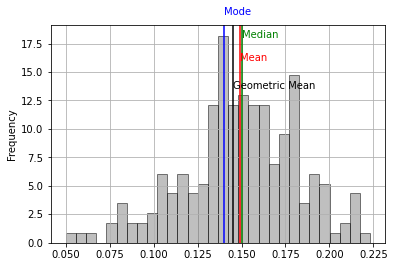

In [13]:
df_por.plot.hist(alpha=0.5, bins=30, grid=True, legend=None, density=True, color='gray',edgecolor='black')
plt.axvline(x=por_average,color='r')
plt.axvline(x=por_median,color='green')
plt.axvline(x=por_mode,color='blue')
plt.axvline(x=por_geometric,color='black')
plt.text(por_mode,20,'Mode',rotation=0,color='blue')
plt.text(por_average,16,'Mean',rotation=0,color='r')
plt.text(por_median,18,'Median',rotation=0,color='green')
plt.text(por_geometric,13.5,'Geometric Mean',rotation=0,color='black')

##### Harmonic Mean

It is calculated by dividing the number of observations by the reciprocal of each number in the series.

\begin{equation}
\overline{x}_H = \frac{n}{\sum^n_{i=1} \frac{1}{x_i}}
\end{equation}


Note: harmonic mean is a good measure of the effective permeability for the case of flow going perpendicular to geologic betting so it's really useful to us.

In [14]:
por_hmean = scipy.stats.mstats.hmean(por)
print('Porosity harmonic mean is ' + str(round(por_hmean,3)) + '.')

Porosity harmonic mean is 0.14.


##### Power Law Average

\begin{equation}
\overline{x}_p = (\frac{1}{n}\sum^n_{i=1}{x_i^{p}})^\frac{1}{p}
\end{equation}

Now we can get a little bit more complicated. <br>
Power law average is the case of the general form. <br>
Harmonic mean is the case of a power -1. p equals to negative one.<br>
Arithmetic mean is the case of a power equals to 1. p equals to one. <br>
Geometric mean is the case of p equals the zero. (deriviaiton using limits)<br>

We can set this power as anything.

In [15]:
power = -0.5
por_power = np.average(np.power(por,power))**(1/power)
print('Porosity power law mean for p = ' + str(power) + ' is ' + str(round(por_power,3)) + '.')

Porosity power law mean for p = -0.5 is 0.143.


In [16]:
power = -1.0 #Harmonic Mean case
por_power = np.average(np.power(por,power))**(1/power)
print('Porosity power law mean for p = ' + str(power) + ' is ' + str(round(por_power,3)) + '.')

Porosity power law mean for p = -1.0 is 0.14.


In [17]:
power = 1.0 #Arithmetic mean case
por_power = np.average(np.power(por,power))**(1/power)
print('Porosity power law mean for p = ' + str(power) + ' is ' + str(round(por_power,3)) + '.')

Porosity power law mean for p = 1.0 is 0.149.


In [ ]:
#  Power law average is used for physics-based experiment to calibrate the power.

### Measures of Dispersion
The spread of the data
##### Population Variance

\begin{equation}
\sigma^2_{x} = \frac{1}{n}\sum^n_{i=1}(x_i - \mu)^2
\end{equation}

In [18]:
por_varp = stats.pvariance(por)
print('Porosity population variance is ' + str(round(por_varp,4)) + '.')

Porosity population variance is 0.0011.


##### Sample Variance

\begin{equation}
\sigma^2_{x} = \frac{1}{n-1}\sum^n_{i=1}(x_i - \overline{x})^2
\end{equation}

In [19]:
por_var = stats.variance(por)
print('Porosity sample variance is ' + str(round(por_var,4)) + '.')

Porosity sample variance is 0.0011.


##### Population Standard Deviation
It is the sqrt of the population variance. We often use standard deviation.

\begin{equation}
\sigma_{x} = \sqrt{ \frac{1}{n}\sum^n_{i=1}(x_i - \mu)^2 }
\end{equation}

In [20]:
por_stdp = stats.pstdev(por)
print('Porosity sample variance is ' + str(round(por_stdp,4)) + '.')

Porosity sample variance is 0.0329.


##### Sample Standard Deviation

\begin{equation}
\sigma_{x} = \sqrt{ \frac{1}{n-1}\sum^n_{i=1}(x_i - \mu)^2 }
\end{equation}

In [21]:
por_std = stats.stdev(por)
print('Porosity sample variance is ' + str(round(por_std,4)) + '.')

Porosity sample variance is 0.0329.


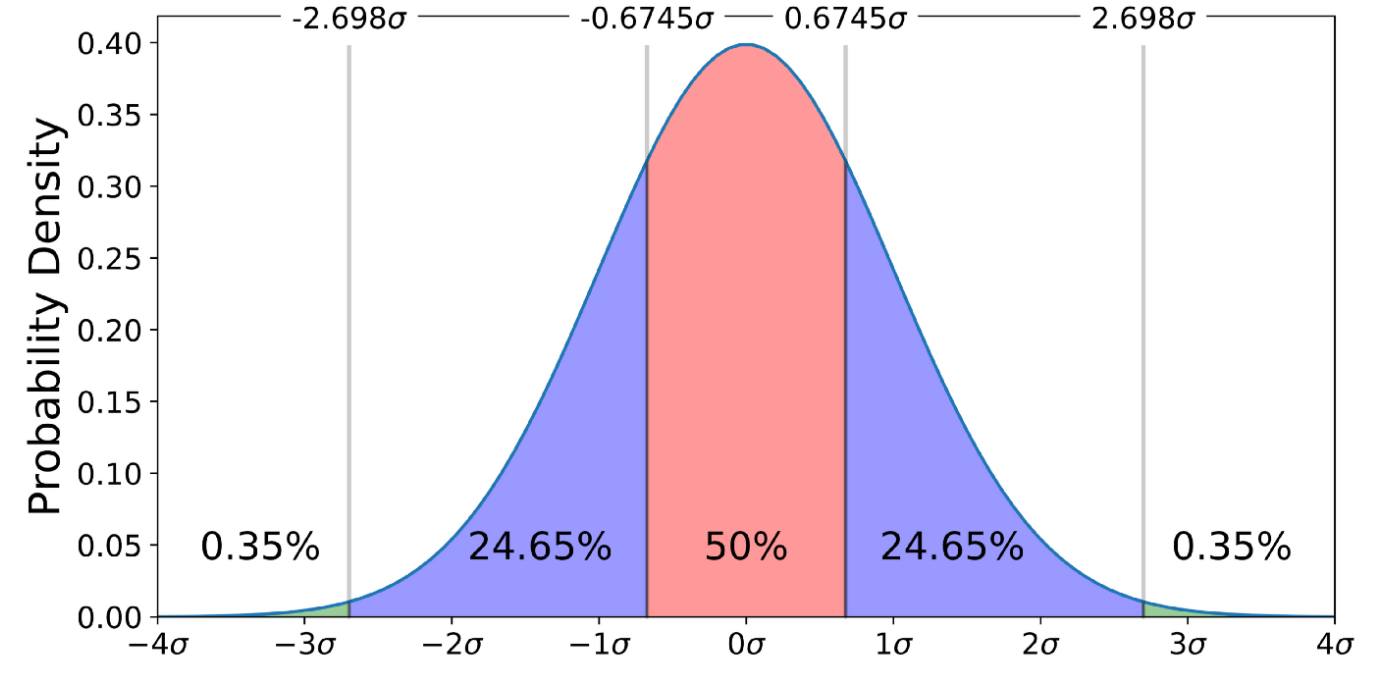

Text(0.05045629794617573, 10, '-3σ')

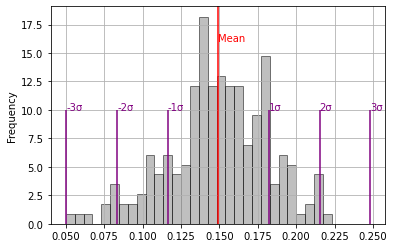

In [22]:
df_por=df['porosity']
df_por.plot.hist(alpha=0.5, bins=30, grid=True, legend=None, density=True, color='gray',edgecolor='black')
plt.axvline(x=por_average,color='r')
plt.vlines(x=por_average+por_std, ymin=0, ymax=10, color='purple')
plt.vlines(x=por_average+por_std*2, ymin=0, ymax=10, color='purple')
plt.vlines(x=por_average+por_std*3, ymin=0, ymax=10, color='purple')
plt.vlines(x=por_average-por_std, ymin=0, ymax=10, color='purple')
plt.vlines(x=por_average-por_std*2, ymin=0, ymax=10, color='purple')
plt.vlines(x=por_average-por_std*3, ymin=0, ymax=10, color='purple')

plt.text(por_average,16,'Mean',rotation=0,color='r')
plt.text(por_average+por_std,10,'1\u03C3',rotation=0,color='purple')
plt.text(por_average+por_std*2,10,'2\u03C3',rotation=0,color='purple')
plt.text(por_average+por_std*3,10,'3\u03C3',rotation=0,color='purple')

plt.text(por_average-por_std,10,'-1\u03C3',rotation=0,color='purple')
plt.text(por_average-por_std*2,10,'-2\u03C3',rotation=0,color='purple')
plt.text(por_average-por_std*3,10,'-3\u03C3',rotation=0,color='purple')

##### Range
the difference between the largest value and the smallest value. Range is the simplest measure of variability in the data.

\begin{equation}
range_x = P100_x - P00_x
\end{equation}

In [23]:
por_range = np.max(por) - np.min(por)
print('Porosity range is ' + str(round(por_range,2)) + '.')

Porosity range is 0.17.


##### Percentile

A measure indicating the value below which a given percentage of observations in a group of observations fall. For example, the 20th percentile is the value (or score) below which 20% of the observations may be found.

\begin{equation}
P(p)_x = F^{-1}_{x}(p)
\end{equation}

In [24]:
p_value = 13
por_percentile = np.percentile(por,p_value)
print('Porosity ' + str(int(p_value)) + 'th percentile is ' + str(round(por_percentile,2)) + '.')

Porosity 13th percentile is 0.11.


In [25]:
df_por.quantile([0.01,0.05,0.1,0.25,0.33,0.5,0.66,0.75,0.9,0.95,0.99])

0.01    0.067197
0.05    0.086688
0.10    0.106100
0.25    0.132175
0.33    0.137134
0.50    0.150150
0.66    0.164000
0.75    0.174200
0.90    0.190140
0.95    0.198105
0.99    0.215801
Name: porosity, dtype: float64

Text(0.215801, -10, '99th')

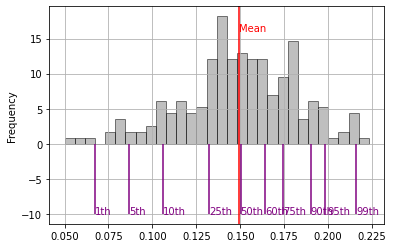

In [26]:
df_por=df['porosity']
df_por.plot.hist(alpha=0.5, bins=30, grid=True, legend=None, density=True, color='gray',edgecolor='black')
plt.axvline(x=por_average,color='r')

plt.vlines(x=0.067197, ymin=-10, ymax=0, color='purple')
plt.vlines(x=0.086688, ymin=-10, ymax=0, color='purple')
plt.vlines(x=0.106100, ymin=-10, ymax=0, color='purple')
plt.vlines(x=0.132175, ymin=-10, ymax=0, color='purple')
#plt.vlines(x=0.137134, ymin=-10, ymax=0, color='purple')
plt.vlines(x=0.150150, ymin=-10, ymax=0, color='purple')
plt.vlines(x=0.164000, ymin=-10, ymax=0, color='purple')
plt.vlines(x=0.174200, ymin=-10, ymax=0, color='purple')
plt.vlines(x=0.190140, ymin=-10, ymax=0, color='purple')
plt.vlines(x=0.198105, ymin=-10, ymax=0, color='purple')
plt.vlines(x=0.215801, ymin=-10, ymax=0, color='purple')

plt.text(por_average,16,'Mean',rotation=0,color='r')
plt.text(0.067197,-10,'1th',rotation=0,color='purple')
plt.text(0.086688,-10,'5th',rotation=0,color='purple')
plt.text(0.106100,-10,'10th',rotation=0,color='purple')
plt.text(0.132175,-10,'25th',rotation=0,color='purple')
#plt.text(0.137134,-10,'33th',rotation=0,color='purple')
plt.text(0.150150,-10,'50th',rotation=0,color='purple')
plt.text(0.164000,-10,'60th',rotation=0,color='purple')
plt.text(0.174200,-10,'75th',rotation=0,color='purple')
plt.text(0.190140,-10,'90th',rotation=0,color='purple')
plt.text(0.1998105,-10,'95th',rotation=0,color='purple')
plt.text(0.215801,-10,'99th',rotation=0,color='purple')

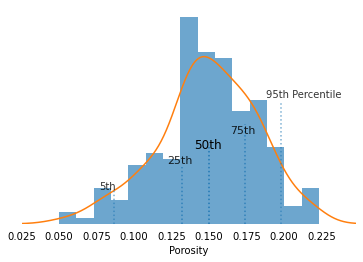

In [27]:
fig, ax = plt.subplots(figsize = (6,4))

# Plot
    # Plot histogram
df_por.plot(kind = "hist", density = True, alpha = 0.65, bins = 15) # change density to true, because KDE uses density
    # Plot KDE
df_por.plot(kind = "kde")

# Quantile lines
quant_5, quant_25, quant_50, quant_75, quant_95 = df_por.quantile(0.05), df_por.quantile(0.25), df_por.quantile(0.5), df_por.quantile(0.75), df_por.quantile(0.95)
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")


# X
ax.set_xlabel("Porosity")
#x range
x_start, x_end = min(df_por)-0.025, max(df_por)+0.025
ax.set_xlim(x_start, x_end)

# Y
#ax.set_ylim(0, 1)
ax.set_yticklabels([])
ax.set_ylabel("")

# Annotations
ax.text(quant_5-0.01, 2.56, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-0.01, 4.47, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-0.01, 5.57, "50th", size = 12, alpha = 1)
ax.text(quant_75-0.01, 6.67, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-0.01, 9.27, "95th Percentile", size = 10, alpha =.8)

# Overall
ax.grid(False)

    # Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.show()

##### Inter Quartile Range
Better measurment for dispersion than the range, because we use upper and lower quartile. Less sensitive to outlier values.


\begin{equation}
IQR = P(0.75)_x - P(0.25)_x
\end{equation}

In [28]:
por_iqr = scipy.stats.iqr(por)
print('Porosity interquartile range is ' + str(round(por_iqr,2)) + '.')

Porosity interquartile range is 0.04.


In [30]:
#interquartile range is little bit less than the actual data range (0.17)

#### Tukey Test for Outliers

Let's demonstrate the Tukey test for outliers based on the lower and upper fences.

\begin{equation}
fence_{lower} = P_x(0.25) - 1.5 \times [P_x(0.75) - P_x(0.25)]
\end{equation}

\begin{equation}
fence_{upper} = P_x(0.75) + 1.5 \times [P_x(0.75) - P_x(0.25)]
\end{equation}

Then we declare samples values above the upper fence or below the lower fence as outliers.

In [29]:
p25, p75 = np.percentile(por, [25, 75])
lower_fence = p25 - por_iqr * 1.5
upper_fence = p75 + por_iqr * 1.5
por_outliers = por[np.where((por > upper_fence) | (por < lower_fence))[0]]
print('Porosity outliers by Tukey test include ' + str(por_outliers) + '.')
por_outliers_indices = np.where((por > upper_fence) | (por < lower_fence))[0]
print('Porosity outlier indices by Tukey test are ' + str(por_outliers_indices) + '.')

Porosity outliers by Tukey test include [0.06726 0.05    0.06092].
Porosity outlier indices by Tukey test are [110 152 198].


##### Let's visualize the outliers with a box plot (Box and Wiseker plot)

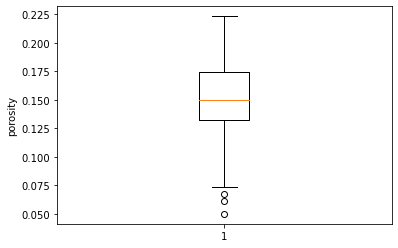

In [32]:
plt.boxplot(por)
plt.ylabel('porosity')
plt.xticks([1])
plt.show()

The median (p50) is the orange line, P25 and P75 are the box and lwoer and upper fences are the wiskers.<br>
Three outliers at the lower tail.

#### Measures of Shape

##### Pearson's Mode Skewness
Skew is a measure of the asymmetry of the distribution about the mean. <br>
Skewness can be positive, negative or undefined.<br>
The greater the absolute of number means more skewness.<br>
Skewness <-1 or >1 is highly skewed<br>
Skewness between -1 and -0.5 or 0.5 and 1 is moderately skewed


Pearson’s first coefficient of skewness.
\begin{equation}
skew = \frac{ (\overline{x} - Mode)}{\sigma_x}
\end{equation}

Pearson’s second coefficient of skewness.
\begin{equation}
skew = \frac{3 (\overline{x} - P50_x)}{\sigma_x}
\end{equation}

if no skew distribution the P50 and mean will be the same. Skew =zero

In [33]:
por_skew = 3*(por_average - por_median)/por_std
print('Porosity skew is ' + str(round(por_skew,2)) + '.')

Porosity skew is -0.08.


In [34]:
df.skew()

X                      -0.157881
Y                       0.097119
facies_threshold_0.3    0.728553
porosity               -0.346577
permeability            4.361126
acoustic_impedance      0.054197
dtype: float64

##### Population Skew, 3rd Central Moment

\begin{equation}
\gamma_{x} = \frac{1}{n}\sum^n_{i=1}(x_i - \mu)^3
\end{equation}

In [35]:
por_cm = scipy.stats.moment(por,moment=3)
print('Porosity 3rd cenral moment is ' + str(round(por_cm,7)) + '.')

Porosity 3rd cenral moment is -1.22e-05.


##### Quartile Skew Coefficient

\begin{equation}
QS = \frac{(P75_x - P50_x) - (P50_x - P25_x)}{(P75_x - P25_x)}
\end{equation}

it's the measure of the difference between the delta or change from the p50 to the p75 minus the p50 to p25, to understand which one is kind of further out and the whole thing is standardized by the interquartile range.

In [36]:
por_qs = ((np.percentile(por,75)-np.percentile(por,50))
          -(np.percentile(por,50)-np.percentile(por,25))) /((np.percentile(por,75))-np.percentile(por,25))
print('Porosity quartile skew coefficient is ' + str(round(por_qs,2)) + '.')

Porosity quartile skew coefficient is 0.14.


In [37]:
#Not very sensitive to tail values

##### Kurtosis
It is the measure of the tailedness of a distribution. In other words how heavy or how light its tails are.<br>
High Kurtosis indicates heavy tails (lots of outliers)<br>
Low Kurtosis indicates light tails (few outliers).<br>


__Positive excess kurtosis__ – when excess kurtosis, given by (kurtosis – 3), is positive, then the distribution has a sharp peak and is called a leptokurtic distribution. (Peaked, light tails)<br>
__Negative excess kurtosis__ – when excess kurtosis, given by (kurtosis – 3), is negative, then the distribution has a flat peak and is called a platykurtic distribution. (Normally distributed)<br>
__Zero excess kurtosis__ – when excess kurtosis, given by (kurtosis – 3), is zero, then the distribution follows a normal distribution and is also called a mesokurtic distribution. (Flattened, heavy tails)<br>

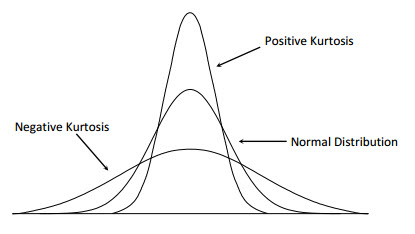

In [38]:
df.kurtosis()

X                       -1.098919
Y                       -1.179044
facies_threshold_0.3    -1.484154
porosity                 0.086417
permeability            21.554387
acoustic_impedance      -1.213735
dtype: float64

<AxesSubplot:ylabel='Density'>

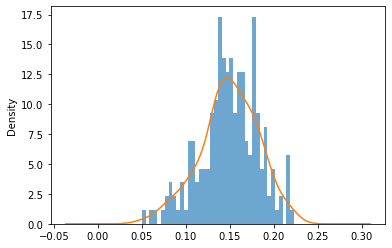

In [39]:
df['porosity'].plot(kind = "hist", density = True, alpha = 0.65, bins = 40) # change density to true, because KDE uses density
    # Plot KDE
df['porosity'].plot(kind = "kde")

<AxesSubplot:ylabel='Density'>

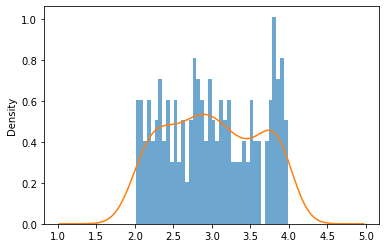

In [40]:
df['acoustic_impedance'].plot(kind = "hist", density = True, alpha = 0.65, bins = 40) # change density to true, because KDE uses density
    # Plot KDE
df['acoustic_impedance'].plot(kind = "kde")

##### Frequencies

Frequencies measures the number of times something has been observed in a dataset.

In [41]:
df['facies_threshold_0.3'].value_counts()

1    134
2     66
Name: facies_threshold_0.3, dtype: int64

In [42]:
def categorise(row):  
    if row['facies_threshold_0.3'] == 1:
        return 'Shale'
    return 'Sandstone'

df['formation_type'] = df.apply(lambda row: categorise(row), axis=1)

In [43]:
df['formation_type'].value_counts()

Shale        134
Sandstone     66
Name: formation_type, dtype: int64

##### Proportions

Proportion measures the percentage value associated with a population. Also defined as the ratio of values in a subset to the values in the dataset.

In [44]:
CT_formation=pd.crosstab(index=df['formation_type'],columns="count")
CT_formation/CT_formation.sum()

col_0,count
formation_type,
Sandstone,0.33
Shale,0.67


##### Comparisons

Comparisons of porosity and formation type.<br>
- Quantative (continuous) and Qualitative (categorical) variables.
- Compare __means__ between groups.

In [45]:
SummaryByFormation=df.groupby('formation_type')['porosity'].describe()
SummaryByFormation

,count,mean,std,min,25%,50%,75%,max
formation_type,,,,,,,,
Sandstone,66.0,0.164563,0.032440,0.0784,0.144175,0.1642,0.191050,0.2232
Shale,134.0,0.141782,0.030617,0.0500,0.124375,0.1428,0.164225,0.2063


##### Comparisons

Comparisons of Two Qualitative (categorical) variables.<br>
- Two Qualitative (categorical) variables.
- Compare __proportions__ between groups.

In [46]:
from seaborn import load_dataset
# Import data
df_tips = load_dataset("tips")
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [47]:
pd.crosstab(df_tips['time'], df_tips['day'])

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61,7,0,0
Dinner,1,12,87,76


In [48]:
pd.crosstab(df_tips['sex'], df_tips['smoker'], normalize='index', margins=True)

smoker,Yes,No
sex,,
Male,0.382166,0.617834
Female,0.379310,0.620690
All,0.381148,0.618852


##### Comparisons

How to quantify relationship/comparison between two variables?

- Two Quantative (continuous) variables.
- We get the __correlation__ between the two variables.

In [49]:
perm = df['permeability'].values

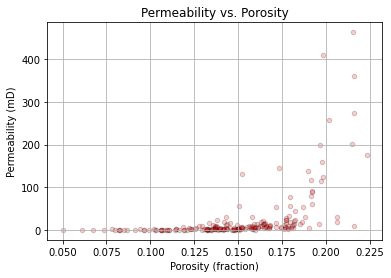

In [50]:
plt.scatter(por,perm,c = 'red',alpha=0.2, s = 20,edgecolors = 'black')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Permeability (mD)')
plt.title('Permeability vs. Porosity'); plt.grid()

##### Pearson Product Moment Correlation Coefficient
Provides a measure of the degree of linear relationship.


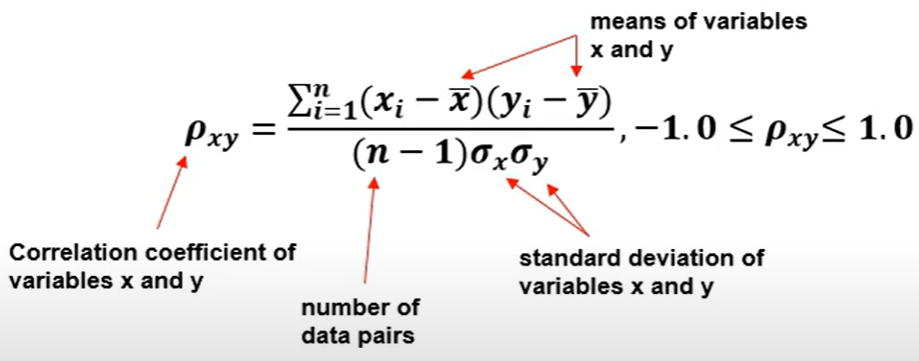


Correlation Coefficient is a standardized covariance


We can use Numpy ot calculate the correlation matrix including:

* sample variances on the diagonal
* sample correlation on the off-diagonal 

We must put the two features into an $2 \times n$ array.

In [51]:
corr_matrix = np.corrcoef(np.array([por,perm])) #or df['permeability'].corr(df['porosity'])

print('Sample Pearson product moment correlation coefficient of permeability and porosity is ' + str(round(corr_matrix[0,1],3)))

Sample Pearson product moment correlation coefficient of permeability and porosity is 0.505


We can use Scipy to calculate the product moment correlation between 2 1D, paired arrays. 

* we also get the p-value for the significance of the measure.

In [52]:
from scipy.stats import pearsonr          # Pearson product moment correlation

corr, corr_p_value = pearsonr(por,perm)

print('Sample Pearson product moment correlation coefficient of permeability and porosity is ' + str(round(corr,3)))
print('Sample Pearson product moment correlation coefficient of permeability and porosity p-value is ' + str(round(corr_p_value,6)))

Sample Pearson product moment correlation coefficient of permeability and porosity is 0.505
Sample Pearson product moment correlation coefficient of permeability and porosity p-value is 0.0


##### Spearman Rank Correlation Coefficient
- Provide a measure of the degree of monotonic relationship. <br>
- Replace X and Y from Pearson corr by the R of X and Y where R is the rank transform.<br>

- Rank transform, e.g. $R_{xi}$,sort the data in ascending order and replace the data with the index, i = 1,....,n. 
- Spearman's rank correlation coefficient is more robust in the presence of outliers and some nonlinear features than the Pearson's correlation coefficient.<br>

- It is measure the strenght and direction of the association between two quantative contionus variables.<br>
- Correlation values range from -1 to 1 with those closer to +/-1 haveing a perfect degress of association and those closer to 0 having no association.<br>

- The degree of the relationship is indicated by the sign:<br>
    - +ve indicates positive direct association
    - -ve indicates negatice inverse assosication

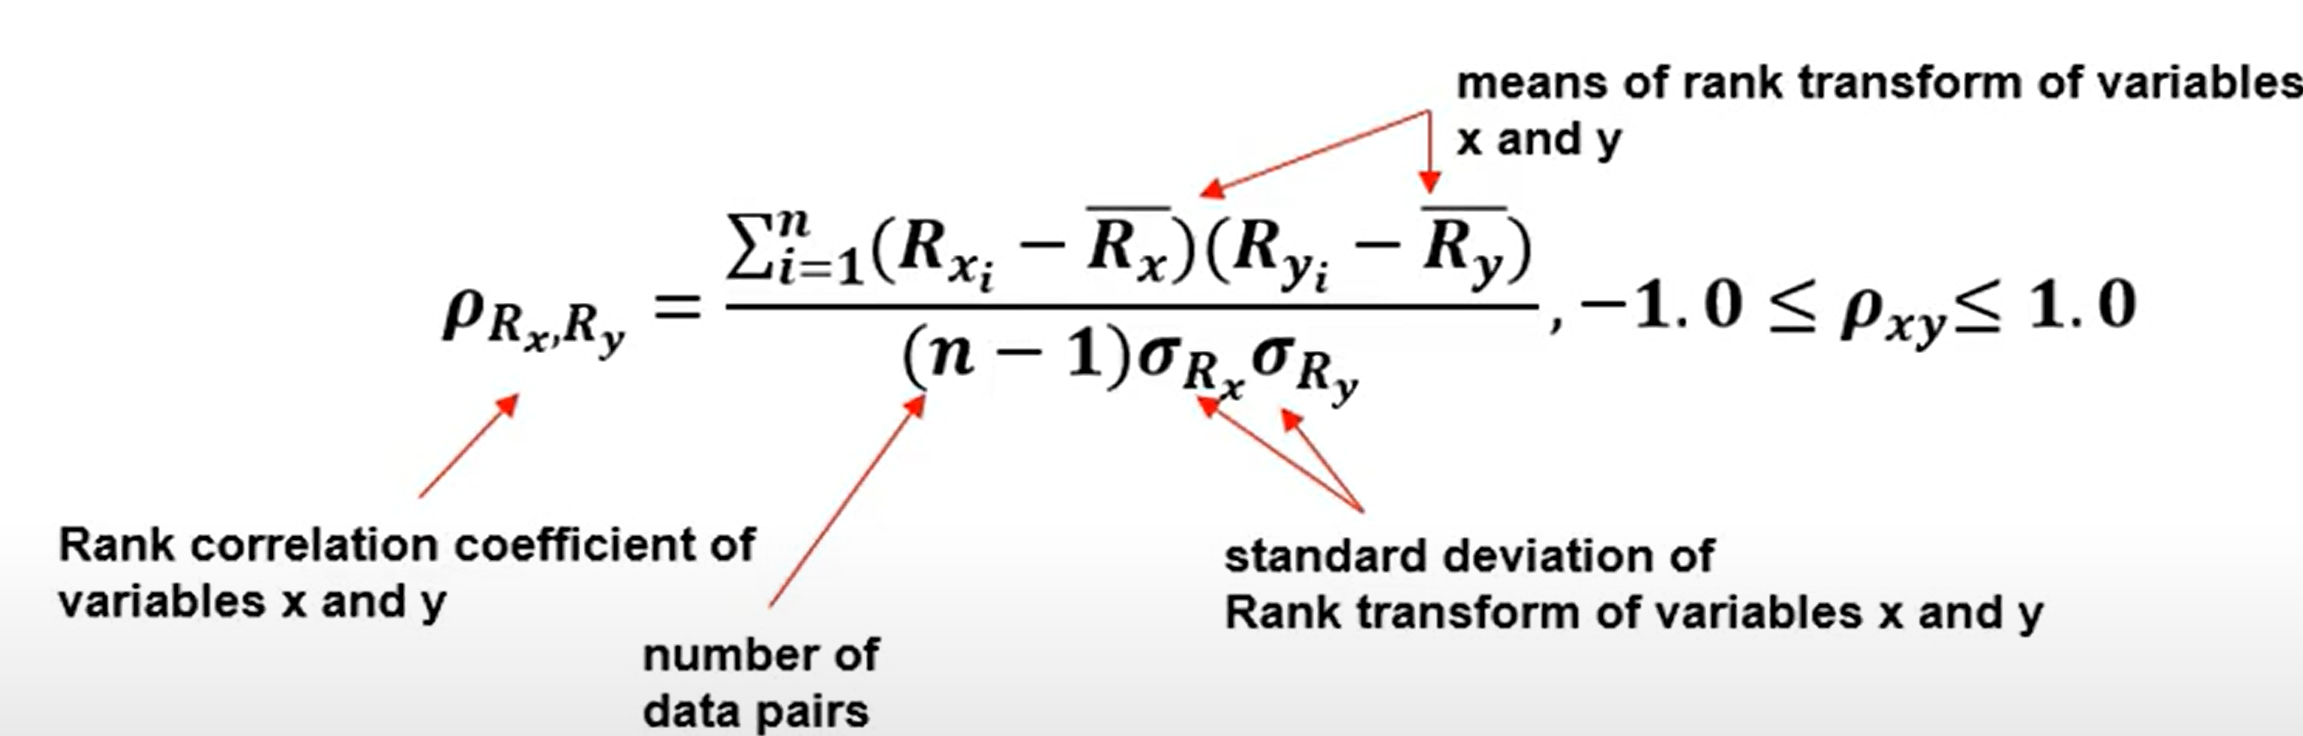
We can use Scipy to calculate the rank correlation between 2 1D, paired arrays. 

* we also get the p-value for the significance of the measure.

In [53]:
from scipy.stats import spearmanr         # spearman rank correlation

rank_corr = spearmanr(por,perm)[0]
rank_corr_p_value = spearmanr(por,perm)[1]

print('Sample Spearman rank correlation coefficient of permeability and porosity is ' + str(round(rank_corr,2)))
print('Sample Spearman rank correlation coefficient of permeability and porosity p-value is ' + str(round(rank_corr_p_value,4)))

Sample Spearman rank correlation coefficient of permeability and porosity is 0.82
Sample Spearman rank correlation coefficient of permeability and porosity p-value is 0.0


##### Covariance 
A measure of how 2 variables vary together.<br>
How two random variables in a data set will change together. A positive covariance means that the two variables at hand are positively related, and they move in the same direction.<br>
Sensitive to outliers.
\begin{equation}
C_{X,Y} = \frac{\sum^n_{i=1}(x_i - \overline{x})(y_i - \overline{y})}{(n-1)}
\end{equation}

In [54]:
cov_matrix = np.cov(np.array([por,perm]),bias=True)
cov_matrix

array([[1.08013743e-03, 1.06821462e+00],
       [1.06821462e+00, 4.13561630e+03]])

##### Variance 
A measure of how 1 variables varies with itself. It is the squared deviation of a random variable from its population mean or sample mean.
\begin{equation}
S^2 = \frac{\sum^n_{i=1}(x_i - \overline{x})^2}{(n-1)}
\end{equation}

In [55]:
var_matrix = np.var(np.array([por]))
var_matrix

0.0010801374314975

In [56]:
var_matrix = np.var(np.array([perm]))
var_matrix

4135.6163035063855

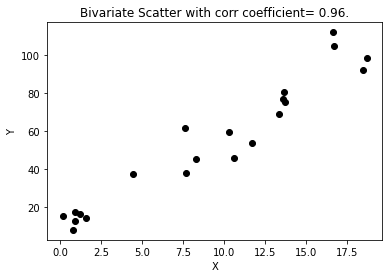

In [57]:
X=[7.58992805755395,10.3237410071942,11.6906474820143,10.6115107913669,8.27338129496402,7.6978417266187,4.46043165467626,0.755395683453238,0.143884892086331,0.899280575539569,1.58273381294964,0.899280575539569,1.18705035971223,13.3453237410071,13.705035971223,13.5611510791366,13.6330935251798,18.4532374100719,18.705035971223,16.6906474820143,16.6187050359712]
Y=[61.7204301075268,59.5698924731182,53.5483870967741,45.5913978494623,44.9462365591397,37.8494623655913,36.9892473118279,7.74193548387096,14.8387096774193,12.258064516129,13.9784946236559,17.4193548387096,16.1290322580645,68.8172043010752,75.268817204301,76.9892473118279,80.4301075268817,92.258064516129,98.2795698924731,104.946236559139,112.043010752688]
plt.plot(X,Y, 'o', color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Scatter with corr coefficient= '+ str(round(pearsonr(X,Y)[0],2)) + '.')
plt.show()

There is a pretty strong degree of linear behavior there's not a lot of scatter around the line and that results in a very high correlation coefficient.

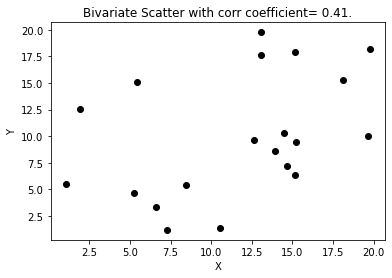

In [58]:
X=[1.93735498839907,5.44083526682134,13.0742459396751,13.0510440835266,15.1624129930394,19.7795823665893,18.0858468677494,19.6635730858468,15.1392111368909,14.6519721577726,13.9559164733178,12.6566125290023,14.4895591647331,15.2320185614849,8.43387470997679,5.2784222737819,6.62412993039443,7.2737819025522,10.5452436194895,1.05568445475637]
Y=[12.5934579439252,15.0934579439252,17.6635514018691,19.7663551401869,17.8971962616822,18.1542056074766,15.233644859813,10.0233644859813,6.30841121495327,7.19626168224299,8.6214953271028,9.67289719626168,10.303738317757,9.46261682242991,5.37383177570093,4.69626168224299,3.31775700934579,1.19158878504672,1.4018691588785,5.49065420560747]
plt.plot(X,Y, 'o', color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Scatter with corr coefficient= '+ str(round(pearsonr(X,Y)[0],2)) + '.')
plt.show()

There is a degree of scatter and we can see kind of greater density
it's not an obvious linear relation blast but it does have pretty good scatter that results in 0.41 correlation coefficient.

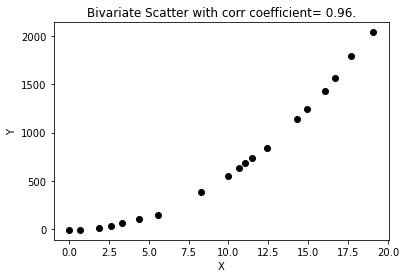

In [59]:
X=[0,0.717592592592593,1.875,2.66203703703703,3.33333333333333,4.375,5.5787037037037,8.28703703703703,10,10.6481481481481,11.0416666666666,11.4583333333333,12.4305555555555,14.2824074074074,14.9305555555555,16.0185185185185,16.6898148148148,17.7083333333333,19.074074074074]
Y=[-7.04225352112689,-10.5633802816901,7.04225352112689,31.6901408450703,56.3380281690142,102.112676056337,147.887323943662,383.802816901408,545.774647887323,630.281690140845,683.098591549295,732.394366197182,841.549295774647,1140.84507042253,1246.47887323943,1436.61971830985,1566.9014084507,1792.25352112676,2042.25352112676]
plt.plot(X,Y, 'o', color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Scatter with corr coefficient= '+ str(round(pearsonr(X,Y)[0],2)) + '.')
plt.show()

The relationship looks to be deterministic. It represents a perfect prediction as it looks like it's a quadratic function. Good relationship but the correlation coefficient is not equal to 1 is equal to 0.96.<br>
Because it's not perfectly linear there's a curvature which is disrupting the linear type of behavior in the bivariate and that will reduce the correlation coefficient<br>
<br>
What is your expectaion for Spearmean Ranking ?

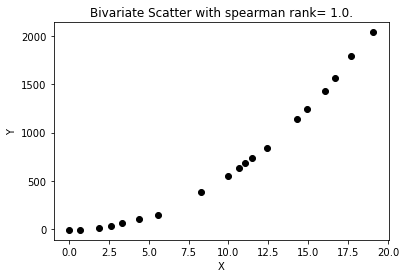

In [60]:
X=[0,0.717592592592593,1.875,2.66203703703703,3.33333333333333,4.375,5.5787037037037,8.28703703703703,10,10.6481481481481,11.0416666666666,11.4583333333333,12.4305555555555,14.2824074074074,14.9305555555555,16.0185185185185,16.6898148148148,17.7083333333333,19.074074074074]
Y=[-7.04225352112689,-10.5633802816901,7.04225352112689,31.6901408450703,56.3380281690142,102.112676056337,147.887323943662,383.802816901408,545.774647887323,630.281690140845,683.098591549295,732.394366197182,841.549295774647,1140.84507042253,1246.47887323943,1436.61971830985,1566.9014084507,1792.25352112676,2042.25352112676]
plt.plot(X,Y, 'o', color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Scatter with spearman rank= '+ str(round(spearmanr(X,Y)[0],2)) + '.')
plt.show()

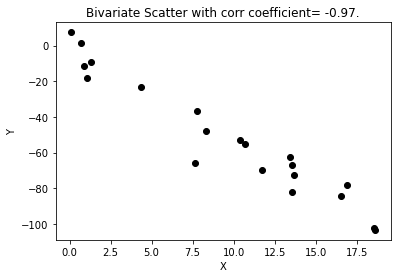

In [61]:
X=[0.0804597701149427,0.678160919540229,1.32183908045977,0.908045977011494,1.06896551724137,4.33333333333333,7.73563218390804,8.3103448275862,7.66666666666666,10.6781609195402,10.3793103448275,11.7126436781609,13.4137931034482,13.5747126436781,13.6896551724137,13.5287356321839,16.5632183908045,16.9080459770114,18.6321839080459,18.5402298850574,]
Y=[7.52000000000002,1.44000000000002,-8.95999999999997,-11.3599999999999,-18.0799999999999,-23.0399999999999,-36.4799999999999,-47.9999999999999,-65.9199999999999,-55.3599999999999,-53.1199999999999,-69.9199999999999,-62.5599999999999,-66.72,-72.64,-82.24,-84.32,-77.92,-103.359999999999,-102.24,]
plt.plot(X,Y, 'o', color='black');plt.xlabel('X');plt.ylabel('Y')
plt.title('Bivariate Scatter with corr coefficient= '+ str(round(pearsonr(X,Y)[0],2)) + '.')
plt.show()

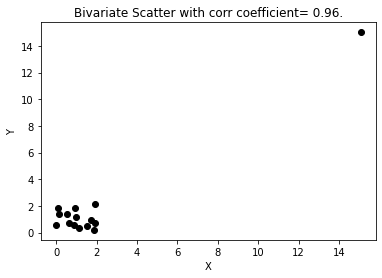

In [62]:
X=[0.00223499361430556,0.0775329927628796,0.122020008514263,0.538686675180929,0.910866326096212,1.00058535547041,0.628086419753088,0.905225627926778,1.11249467858663,1.89878671775223,1.55294806300553,1.90123456790123,1.71700723712218,1.90783312047679,15.0692848020434]
Y=[0.54022988505747,1.80459770114942,1.41379310344827,1.41379310344827,1.80459770114942,1.18390804597701,0.724137931034484,0.586206896551726,0.356321839080461,0.195402298850577,0.494252873563219,0.724137931034484,0.931034482758622,2.14942528735632,15.0229885057471]
plt.plot(X,Y, 'o', color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Scatter with corr coefficient= '+ str(round(pearsonr(X,Y)[0],2)) + '.')
plt.show()

we have a random bivariate data cluster.<br>
We have random numbers between 0 & 2 and we put one data point as a bivariate outlier. <br>
Also considered a univariate outlier this would be an outlier in X and outlier in Y space.<br>
Even though we have random number we get a correlation coefficient 0.95.<br>
one single outlier created artificially changes the correlation and that's why we want to always visualize our data not just calculate a correlation coefficient.

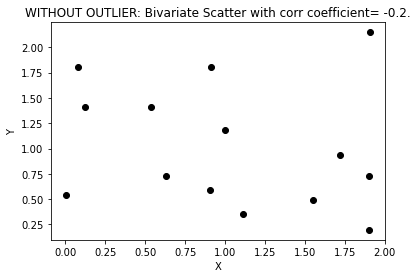

In [63]:
X=[0.00223499361430556,0.0775329927628796,0.122020008514263,0.538686675180929,0.910866326096212,1.00058535547041,0.628086419753088,0.905225627926778,1.11249467858663,1.89878671775223,1.55294806300553,1.90123456790123,1.71700723712218,1.90783312047679]
Y=[0.54022988505747,1.80459770114942,1.41379310344827,1.41379310344827,1.80459770114942,1.18390804597701,0.724137931034484,0.586206896551726,0.356321839080461,0.195402298850577,0.494252873563219,0.724137931034484,0.931034482758622,2.14942528735632]
plt.plot(X,Y, 'o', color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('WITHOUT OUTLIER: Bivariate Scatter with corr coefficient= '+ str(round(pearsonr(X,Y)[0],2)) + '.')
plt.show()

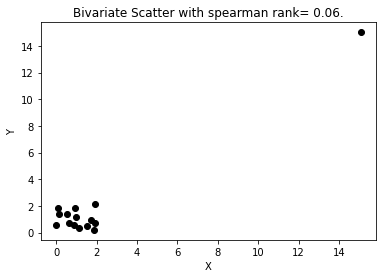

In [64]:
X=[0.00223499361430556,0.0775329927628796,0.122020008514263,0.538686675180929,0.910866326096212,1.00058535547041,0.628086419753088,0.905225627926778,1.11249467858663,1.89878671775223,1.55294806300553,1.90123456790123,1.71700723712218,1.90783312047679,15.0692848020434]
Y=[0.54022988505747,1.80459770114942,1.41379310344827,1.41379310344827,1.80459770114942,1.18390804597701,0.724137931034484,0.586206896551726,0.356321839080461,0.195402298850577,0.494252873563219,0.724137931034484,0.931034482758622,2.14942528735632,15.0229885057471]
plt.plot(X,Y, 'o', color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Scatter with spearman rank= '+ str(round(spearmanr(X,Y)[0],2)) + '.')
plt.show()

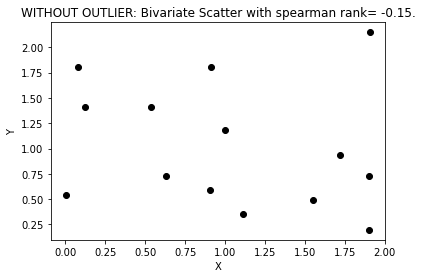

In [65]:
X=[0.00223499361430556,0.0775329927628796,0.122020008514263,0.538686675180929,0.910866326096212,1.00058535547041,0.628086419753088,0.905225627926778,1.11249467858663,1.89878671775223,1.55294806300553,1.90123456790123,1.71700723712218,1.90783312047679]
Y=[0.54022988505747,1.80459770114942,1.41379310344827,1.41379310344827,1.80459770114942,1.18390804597701,0.724137931034484,0.586206896551726,0.356321839080461,0.195402298850577,0.494252873563219,0.724137931034484,0.931034482758622,2.14942528735632]
plt.plot(X,Y, 'o', color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('WITHOUT OUTLIER: Bivariate Scatter with spearman rank= '+ str(round(spearmanr(X,Y)[0],2)) + '.')
plt.show()

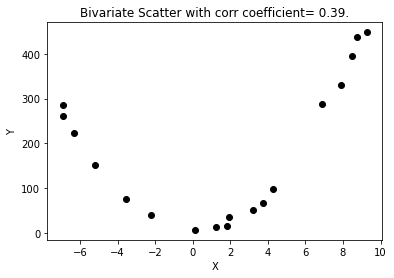

In [66]:
X=[-6.92488262910798,-6.90140845070422,-6.31455399061032,-5.18779342723004,-3.54460093896713,-2.2300469483568,0.117370892018778,1.26760563380281,1.83098591549295,1.92488262910798,3.19248826291079,3.75586854460093,4.29577464788732,6.90140845070422,7.88732394366197,8.49765258215962,8.75586854460093,9.27230046948356]
Y=[286.666666666666,261.403508771929,222.807017543859,151.228070175438,74.7368421052631,39.6491228070175,6.66666666666662,12.2807017543859,16.4912280701754,35.438596491228,50.8771929824562,67.0175438596491,97.1929824561403,288.771929824561,329.473684210526,394.035087719298,437.543859649122,448.070175438596]
plt.plot(X,Y, 'o', color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Scatter with corr coefficient= '+ str(round(pearsonr(X,Y)[0],2)) + '.')
plt.show()

We have parabolic relationship [negative and positive relationships at the same time].<br>

In general is that the correlation will decrease because we're further violating the assumption of linearity as we have extreme curvature.


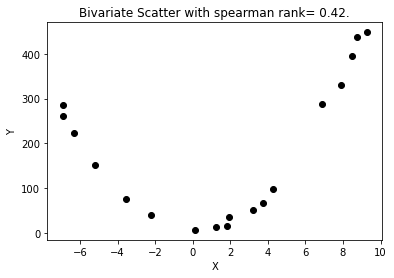

In [67]:
X=[-6.92488262910798,-6.90140845070422,-6.31455399061032,-5.18779342723004,-3.54460093896713,-2.2300469483568,0.117370892018778,1.26760563380281,1.83098591549295,1.92488262910798,3.19248826291079,3.75586854460093,4.29577464788732,6.90140845070422,7.88732394366197,8.49765258215962,8.75586854460093,9.27230046948356]
Y=[286.666666666666,261.403508771929,222.807017543859,151.228070175438,74.7368421052631,39.6491228070175,6.66666666666662,12.2807017543859,16.4912280701754,35.438596491228,50.8771929824562,67.0175438596491,97.1929824561403,288.771929824561,329.473684210526,394.035087719298,437.543859649122,448.070175438596]
plt.plot(X,Y, 'o', color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Scatter with spearman rank= '+ str(round(spearmanr(X,Y)[0],2)) + '.')
plt.show()

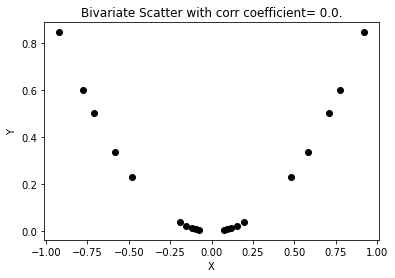

In [68]:
#Range -1 to 1
size = 10
np.set_printoptions(precision=1)
X = np.random.uniform(0,1, size)
X=np.append(X,X*-1)
Y=X**2

plt.plot(X,Y, 'o', color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Scatter with corr coefficient= '+ str(round(pearsonr(X,Y)[0],2)) + '.')
plt.show()

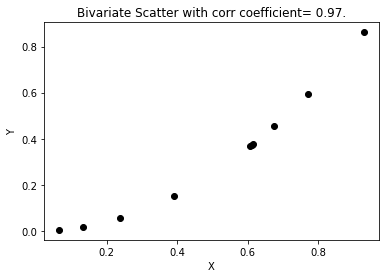

In [69]:
#Range 0 o 1

size = 10
np.set_printoptions(precision=1)
X = np.random.uniform(0,1, size)
Y=X**2

plt.plot(X,Y, 'o', color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Scatter with corr coefficient= '+ str(round(pearsonr(X,Y)[0],2)) + '.')
plt.show()

##### __Correlation__ is NOT __Causation__

Correlation does not imply causation so just because we see a trend that is one variable goes up the other variable goes up it doesn't suggest that this causes that.

We need a "true experiment" where one variable is manipulated and others are rigorously controlled! 

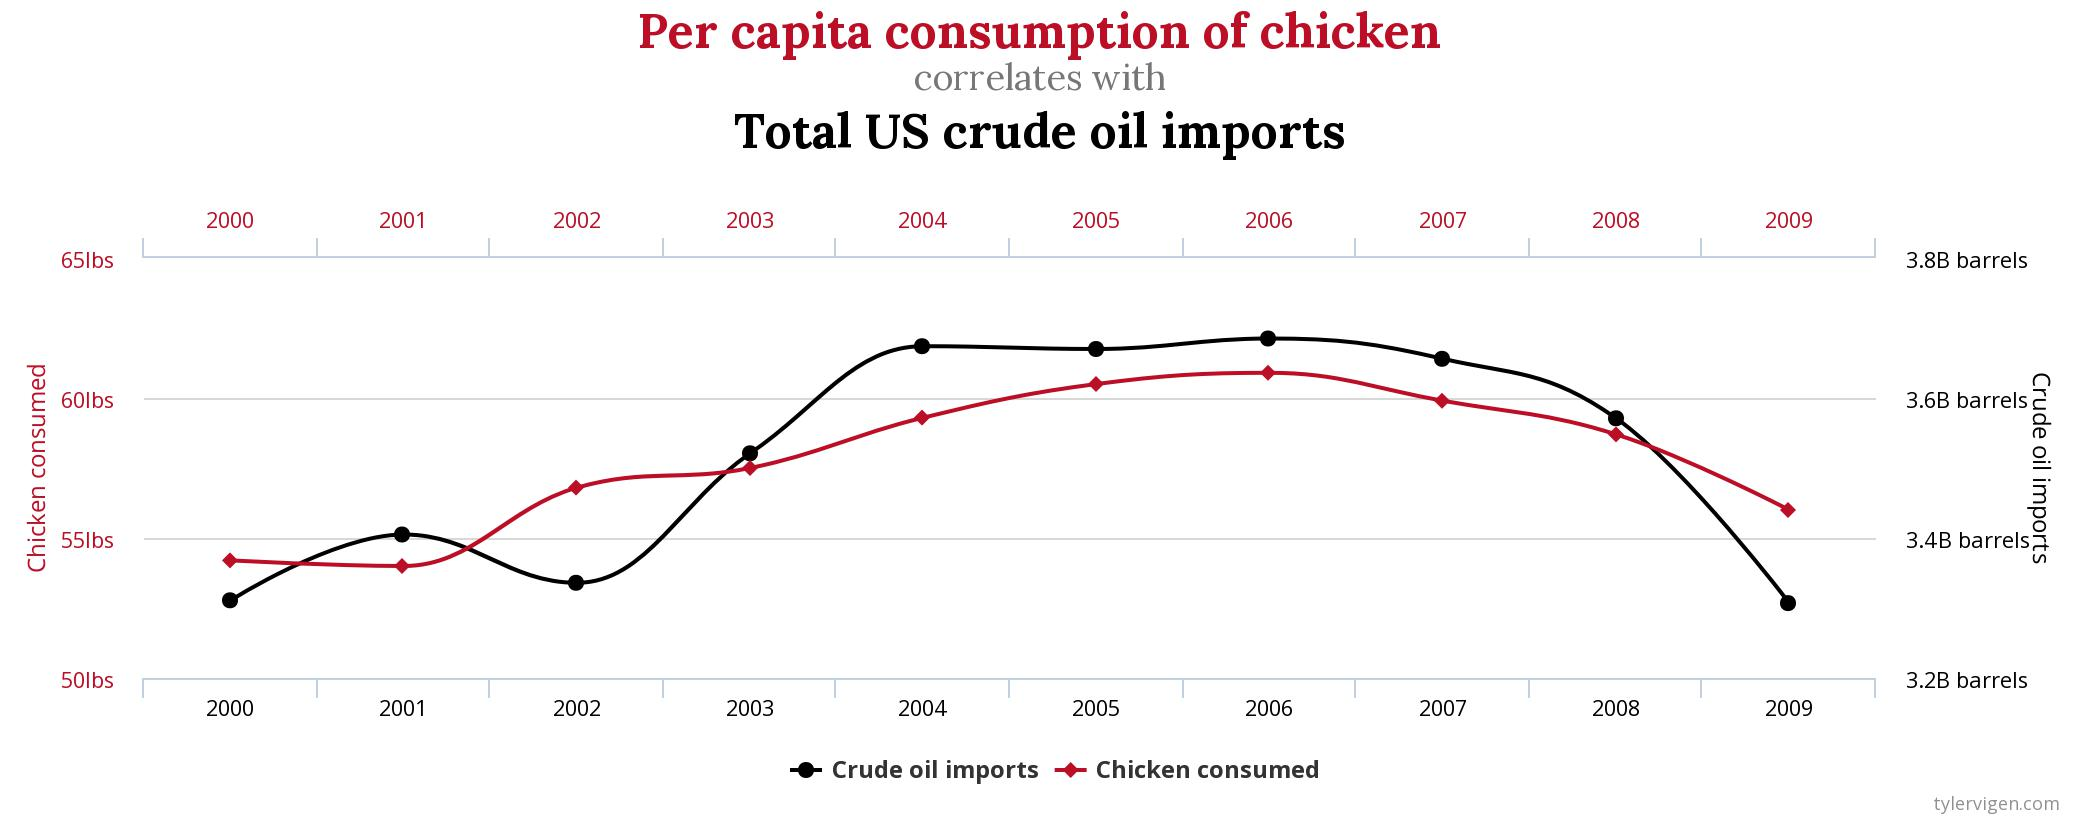

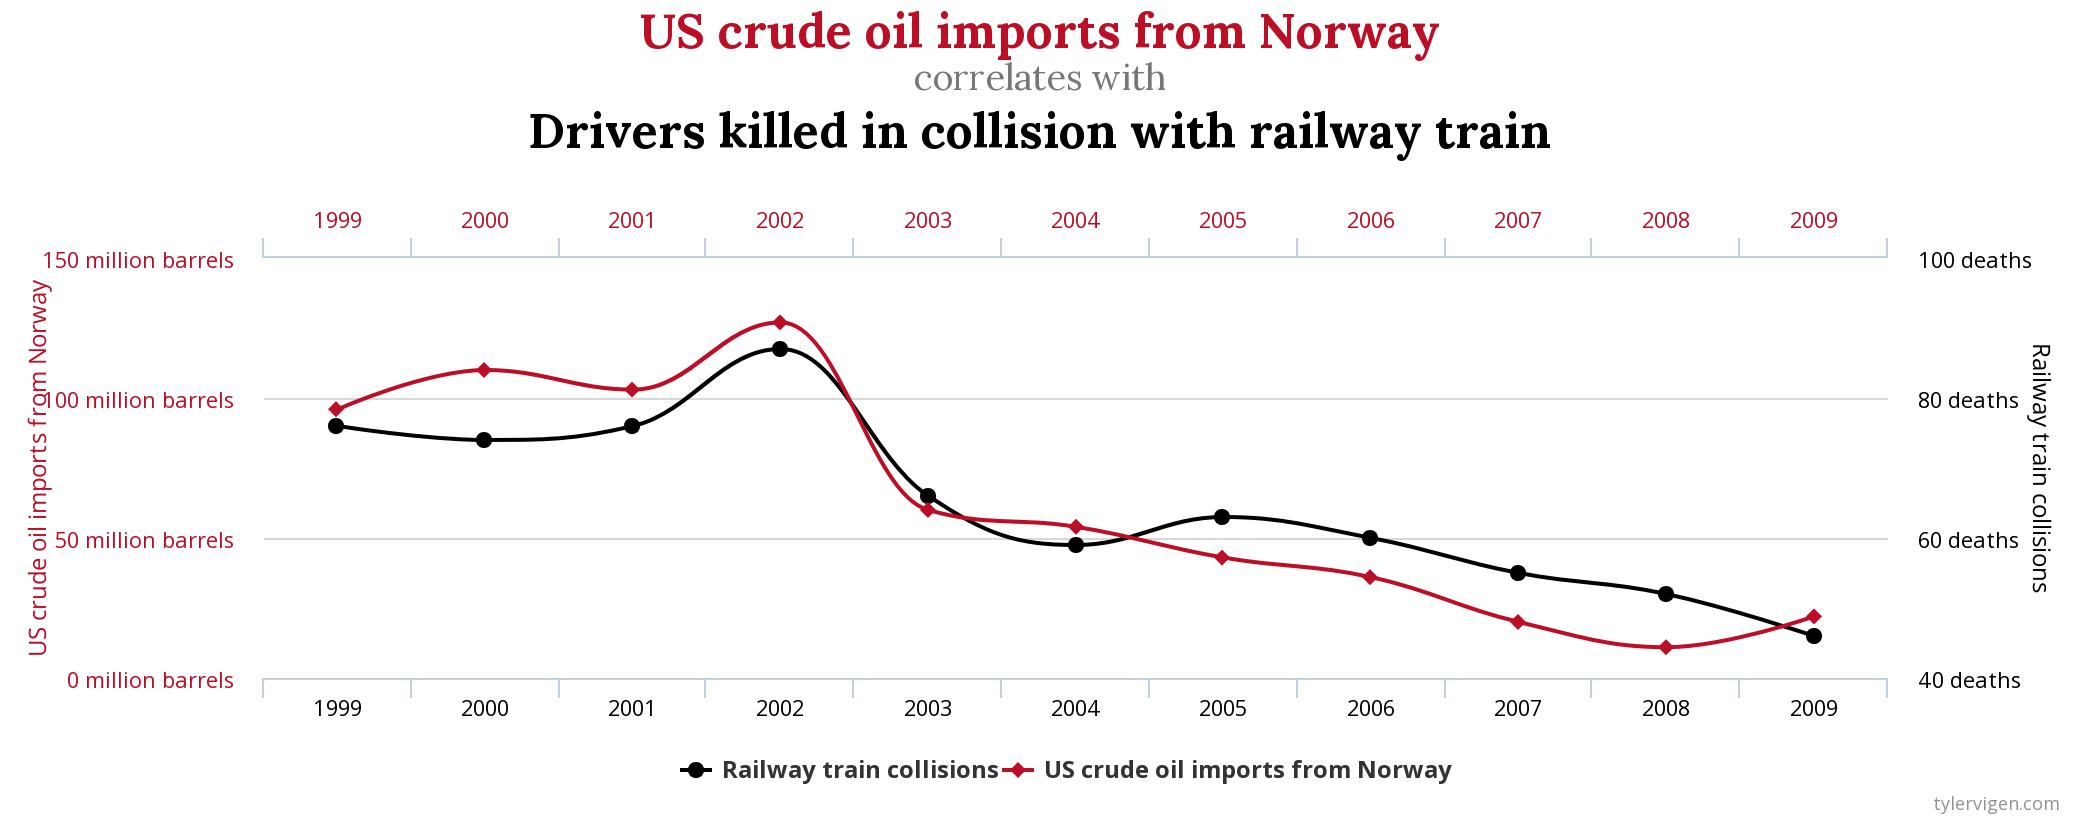

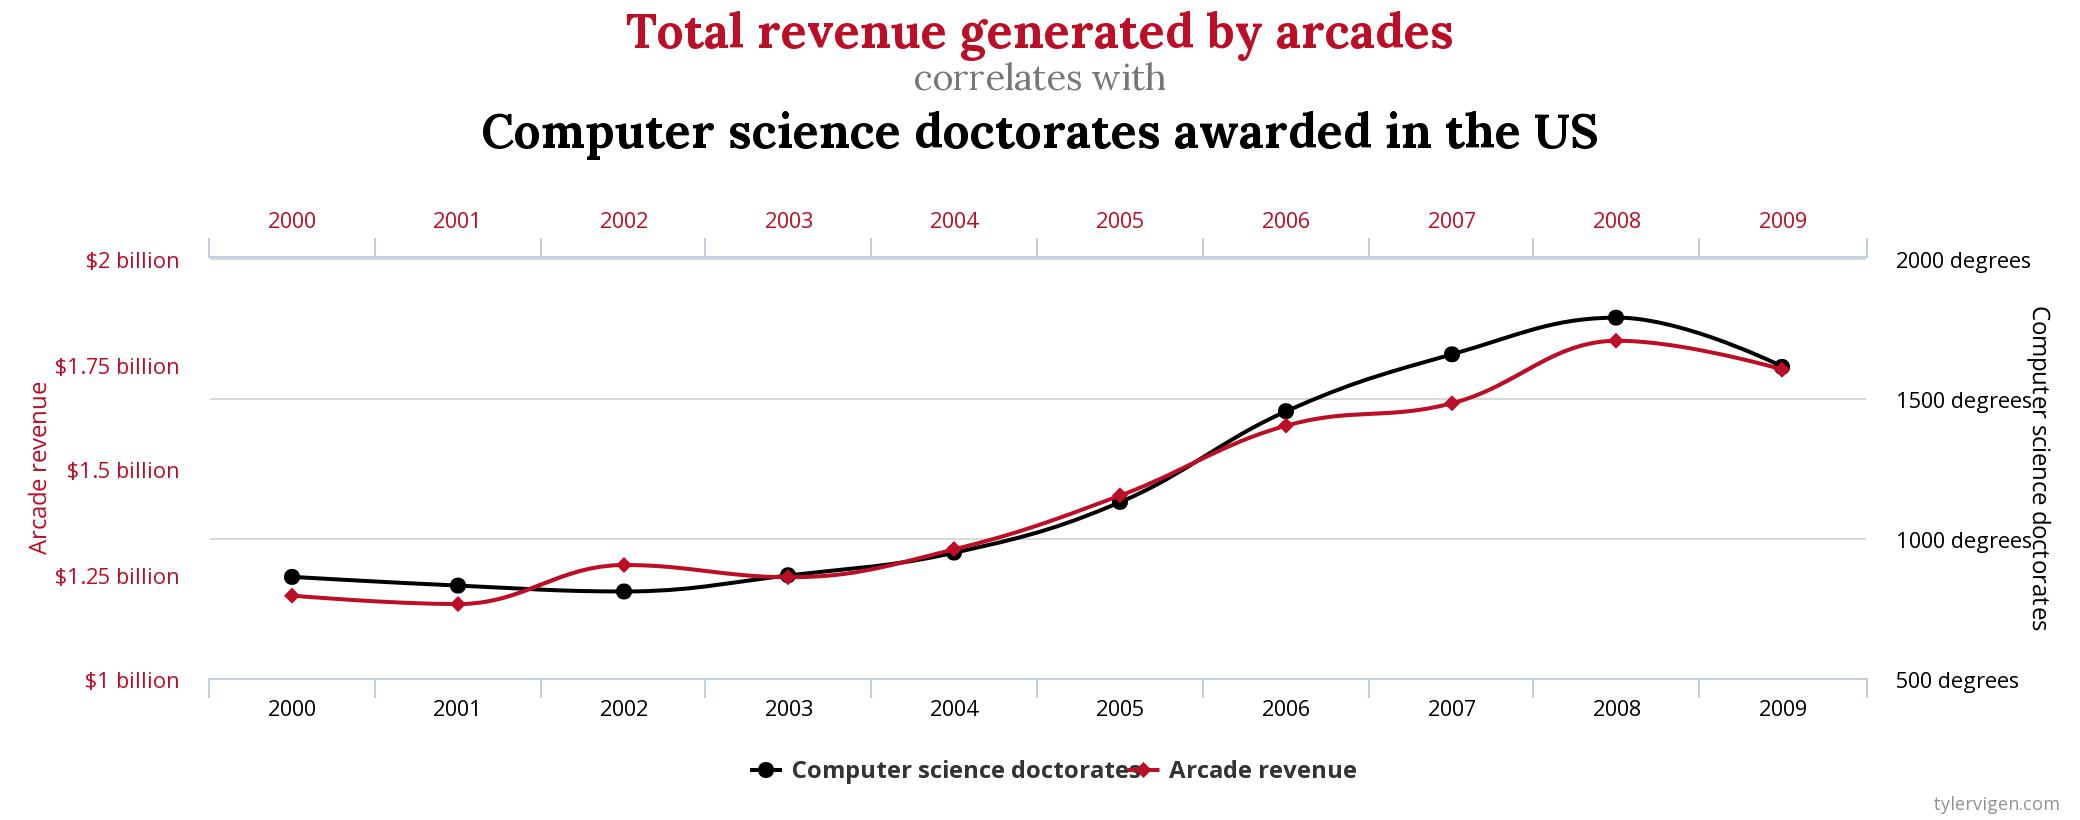

## Hypothesis Testing - Diagnostic Analysis: Correlation
Analytical Question: Is there an association between porosity and permeability ?

In [70]:
from scipy.stats import pearsonr          # Pearson product moment correlation

corr, corr_p_value = pearsonr(por,perm)

print('Sample Pearson product moment correlation coefficient of permeability and porosity is ' + str(round(corr,3)))
print('Sample Pearson product moment correlation coefficient of permeability and porosity p-value is ' + str((corr_p_value)))

Sample Pearson product moment correlation coefficient of permeability and porosity is 0.505
Sample Pearson product moment correlation coefficient of permeability and porosity p-value is 2.2964821145736405e-14


The p-value from the t-statistics is less than 0.05 therfore we assume there is a statistically positive association between porosity and permeability.

## Hypothesis Testing - Diagnostic Analysis: Independent t-test

A t-test is used to compare the means of a __quantative__ variable to __two__ independent groups (__qualitative__)

Analytical Question: Is there an association between porosity and Formation Type ?

In [71]:
SummaryByFormation=df.groupby('formation_type')['porosity'].describe()
SummaryByFormation

,count,mean,std,min,25%,50%,75%,max
formation_type,,,,,,,,
Sandstone,66.0,0.164563,0.032440,0.0784,0.144175,0.1642,0.191050,0.2232
Shale,134.0,0.141782,0.030617,0.0500,0.124375,0.1428,0.164225,0.2063


In [72]:
from scipy.stats import ttest_ind
df_Sand=df.loc[df['formation_type']=='Sandstone']
Sand_por=df_Sand['porosity']
df_Shale=df.loc[df['formation_type']=='Shale']
Shale_por=df_Shale['porosity']

ttest, pval= ttest_ind(Sand_por,Shale_por,equal_var=False)

print('t-test statistics = ', ttest, 'p-val =', pval)

t-test statistics =  4.756417956249056 p-val = 5.416637817094433e-06


the p-value from the t-statistics is LESS THAN 0.05, therefore, we assume sand porosity is statistically significantly higher than shale. 

In [73]:
from scipy.stats import ttest_ind
df_Sand=df.loc[df['formation_type']=='Sandstone']
Sand_perm=df_Sand['permeability']
df_Shale=df.loc[df['formation_type']=='Shale']
Shale_perm=df_Shale['permeability']

ttest, pval= ttest_ind(Sand_perm,Shale_perm,equal_var=False)

print('t-test statistics = ', ttest, 'p-val =', pval)

t-test statistics =  2.8529103412417096 p-val = 0.005525258032208505


## Hypothesis Testing - Diagnostic Analysis: Analysis of Variance (ANOVA)

ANOVA is used to detect the differences in the means (__quantative__) of 3 or more __qualitative__ groups.

Uses as of ration between group variance to the within group variance to decide whether there are statisically significant difference between groups or not.

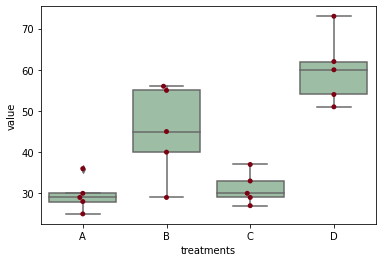

In [74]:
import seaborn as sns
# load data file
df_anova = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")

# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df_anova.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [75]:
SummaryByTreatment=df_melt.groupby('treatments')['value'].describe()
SummaryByTreatment

,count,mean,std,min,25%,50%,75%,max
treatments,,,,,,,,
A,5.0,29.6,4.037326,25.0,28.0,29.0,30.0,36.0
B,5.0,45.0,11.202678,29.0,40.0,45.0,55.0,56.0
C,5.0,31.2,3.898718,27.0,29.0,30.0,33.0,37.0
D,5.0,60.0,8.514693,51.0,54.0,60.0,62.0,73.0


In [76]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [77]:
ANOVA_Tr=ols('value ~ treatments', data=df_melt).fit()
ANOVA_Tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     17.49
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           2.64e-05
Time:                        19:08:35   Log-Likelihood:                -66.643
No. Observations:                  20   AIC:                             141.3
Df Residuals:                      16   BIC:                             145.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          29.6000      3.387      8.738      0.000      22.419      36.781
treatments[T.B]    15.4000      4.791      3.215      0.005       5.244      25.556
treatments[T.C]     1.6000      4.791      0.334      0.743      -8.556      11.756
treatments[T.D]    30.4000      4.791      6.346      0.000      20.244      40.556
==============================================================================
Omnibus:                        0.549   Durbin-Watson:                   2.629
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.020
Skew:                          -0.057   Prob(JB):                        0.990
Kurtosis:                       3.105   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
SimpleANOVA_Tr=sm.stats.anova_lm(ANOVA_Tr, typ=2)
SimpleANOVA_Tr

,sum_sq,df,F,PR(>F)
treatments,3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.

## Hypothesis Testing - Diagnostic Analysis: Chi-square

A Chi-squared test is a test that is used to determine whether there is a significant difference between expected frequencies and observed frequencies on one or more categories amongst 
(__two qualitative__) categorical variables.

In [79]:
df_WithQuality=pd.read_csv('por_perm.csv')
df_WithQuality.head()

,CORE_NO,permeability,porosity,perm_quality
0,1,13.80,0.170,moderate
1,1,25.20,0.108,moderate
2,1,1.02,0.128,fair
3,1,524.00,0.164,very good
4,1,274.00,0.165,very good


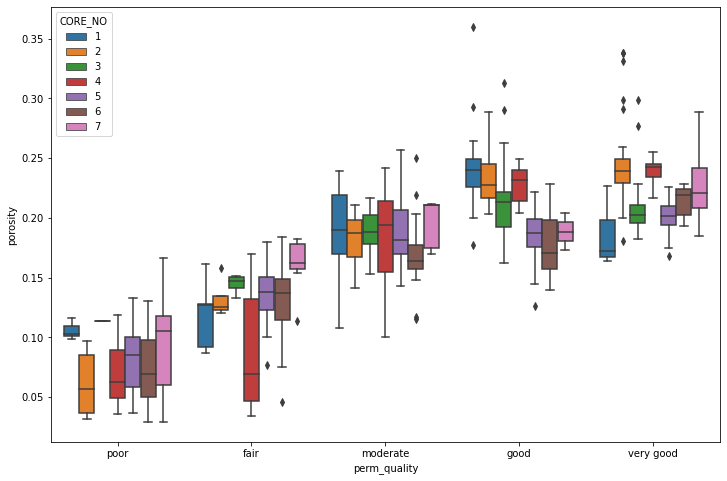

In [80]:
perm = [ "poor", "fair", "moderate", "good", "very good" ]
plt.figure(figsize=(12,8))
sns.boxplot(x="perm_quality", y="porosity", hue="CORE_NO", data=df_WithQuality, order=perm)
plt.show()

In [81]:
print(pd.crosstab(df_WithQuality['perm_quality'],df_WithQuality['CORE_NO']))
print(pd.crosstab(df_WithQuality['perm_quality'],df_WithQuality['CORE_NO'],normalize="index"))

CORE_NO        1   2   3   4   5   6   7
perm_quality                            
fair           5   4   4  21  23  39   9
good          32  12  61  27  25  21   2
moderate      12  11   6   9   8  14   5
poor           3  12   1  18  22  24  12
very good      7  39  31   7  16   7   8
CORE_NO              1         2         3         4         5         6  \
perm_quality                                                               
fair          0.047619  0.038095  0.038095  0.200000  0.219048  0.371429   
good          0.177778  0.066667  0.338889  0.150000  0.138889  0.116667   
moderate      0.184615  0.169231  0.092308  0.138462  0.123077  0.215385   
poor          0.032609  0.130435  0.010870  0.195652  0.239130  0.260870   
very good     0.060870  0.339130  0.269565  0.060870  0.139130  0.060870   

CORE_NO              7  
perm_quality            
fair          0.085714  
good          0.011111  
moderate      0.076923  
poor          0.130435  
very good     0.069565  


In [82]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

PermCore_CT=pd.crosstab(df_WithQuality['perm_quality'],df_WithQuality['CORE_NO'])
PermCore_chi2=chi2_contingency(PermCore_CT,correction=False)
print("Observed Counts")
print(PermCore_CT)
print("Expected Counts")
print(PermCore_chi2[3])
print("Chi-Square")
print(PermCore_chi2[0])
print("p-value")
print(PermCore_chi2[1])

Observed Counts
CORE_NO        1   2   3   4   5   6   7
perm_quality                            
fair           5   4   4  21  23  39   9
good          32  12  61  27  25  21   2
moderate      12  11   6   9   8  14   5
poor           3  12   1  18  22  24  12
very good      7  39  31   7  16   7   8
Expected Counts
[[11.1 14.7 19.4 15.5 17.7 19.8  6.8]
 [19.1 25.2 33.3 26.5 30.4 33.9 11.6]
 [ 6.9  9.1 12.   9.6 11.  12.3  4.2]
 [ 9.7 12.9 17.  13.5 15.5 17.3  5.9]
 [12.2 16.1 21.3 16.9 19.4 21.7  7.4]]
Chi-Square
195.70788234722102
p-value
7.062376506648984e-29


The p-value from Chi-square statistic is LESS THAN 0.05 therefore we assume there is statistically significance association between core number and permeability quality.

##### Check the if we have Adequate Sample size:
There should be a minimum sample size of 30 and moreover 80% of expected cell counts >5

Since the expected counts are all greater than 1 AND 80% of the expected counts are >5; we can conclude that we have adequate sample sizes.

## Statistical Assumptions: Normality

- The Y variable must be normally distributed
- Shapiro-Wilk test is one of the statistical tests to test normality.
- QQplot and histograms are used to visually inspect the normality.

Let's test normality of porosity data distribution for each formation type

In [83]:
from scipy.stats import shapiro
stat, p = shapiro(df_Sand['porosity'])
print('Sand Formation:')
print('Shapiro Statistic =', stat)
print('p-value =', p)

stat, p = shapiro(df_Shale['porosity'])
print('\nShale Formation:')
print('Shapiro Statistic =', stat)
print('p-value =', p)

Sand Formation:
Shapiro Statistic = 0.9745891094207764
p-value = 0.19319038093090057

Shale Formation:
Shapiro Statistic = 0.9780576229095459
p-value = 0.029029756784439087


Shapiro-Wilk's test is statistically not significant, suggesting that there is __NO__ significant departure from normality (_normally distributed_).

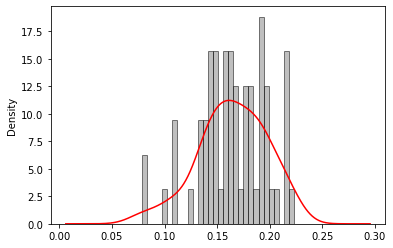

In [84]:
import math
from scipy.stats import norm

Sand_por.plot.hist(alpha=0.5, bins=30, grid=True, legend=None, density=True, color='gray', edgecolor='black')
Sand_por.plot(kind = 'kde',color='r')

plt.show()

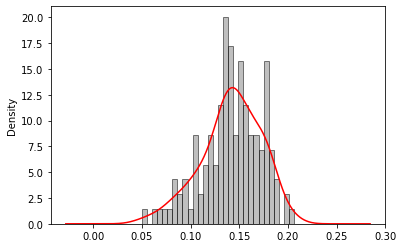

In [85]:
Shale_por.plot.hist(alpha=0.5, bins=30, grid=True, legend=None, density=True, color='gray', edgecolor='black')
Shale_por.plot(kind = 'kde',color='r')

plt.show()

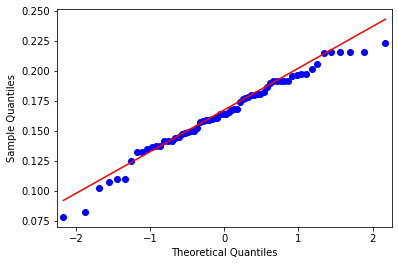

In [86]:
from statsmodels.graphics.gofplots import qqplot

qqplot(Sand_por,line='q')
plt.show()

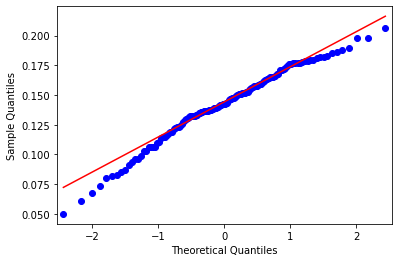

In [87]:
qqplot(Shale_por,line='q')
plt.show()

Let's test normality of permeability data distribution for each formation type

In [88]:
stat, p = shapiro(df_Sand['permeability'])
print('Sand Formation:')
print('Shapiro Statistic =', stat)
print('p-value =', p)

stat, p = shapiro(df_Shale['permeability'])

print('\nShale Formation:')
print('Shapiro Statistic =', stat)
print('p-value =', p)

Sand Formation:
Shapiro Statistic = 0.5726320743560791
p-value = 1.4405502615430499e-12

Shale Formation:
Shapiro Statistic = 0.3157113194465637
p-value = 2.5148052621329943e-22


Shapiro-Wilk's test is statistically significant, suggesting that there is significant departure from normality.
Recommendation: Transform the variable or proceed with caution.

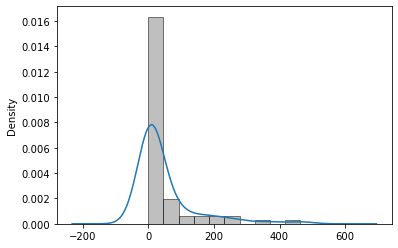

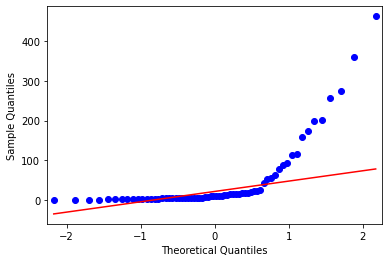

In [89]:
Sand_perm.plot.hist(alpha=0.5, bins=10, grid=True, legend=None, density=True, color='gray', edgecolor='black')
Sand_perm.plot(kind='kde')
qqplot(Sand_perm,line='q')
plt.show()

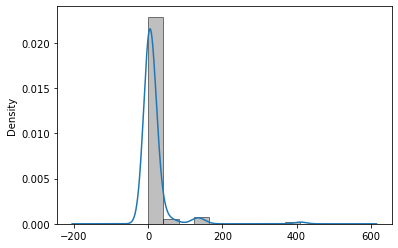

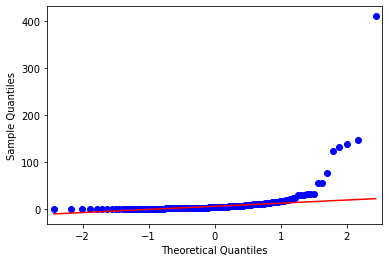

In [90]:
Shale_perm.plot.hist(alpha=0.5, bins=10, grid=True, legend=None, density=True, color='gray', edgecolor='black')
Shale_perm.plot(kind='kde')
qqplot(Shale_perm,line='q')
plt.show()

## Statistical Assumptions: Linearity

- It is assumed that the mean response is linearly related to the X variable.
- Scatterplots are used to visually inspect the linearity.

<AxesSubplot:xlabel='porosity', ylabel='permeability'>

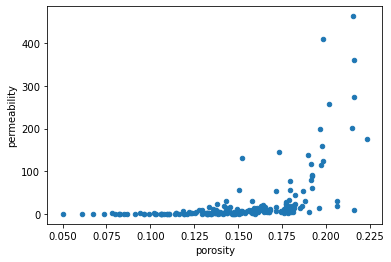

In [91]:
df.plot.scatter(x='porosity',y='permeability')

Text(0.5, 0, 'Core Porosity')

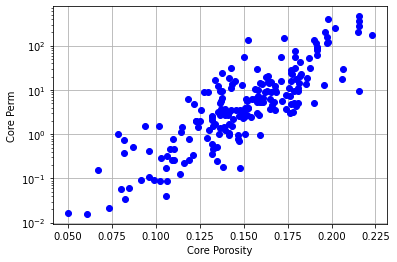

In [92]:
fig, ax = plt.subplots()

ax.semilogy(df['porosity'], df['permeability'], 'bo')

ax.grid(True)
ax.set_ylabel('Core Perm')
ax.set_xlabel('Core Porosity')

In [93]:
x = df['porosity']
x = sm.add_constant(x)
y = np.log10(df['permeability'])

model = sm.OLS(y, x, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           permeability   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     486.5
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           3.12e-55
Time:                        19:15:51   Log-Likelihood:                -137.03
No. Observations:                 200   AIC:                             278.1
Df Residuals:                     198   BIC:                             284.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7986      0.159    -17.635      0.000      -3.112      -2.486
porosity      22.8972      1.038     22.057      0.000      20.850      24.944
==============================================================================
Omnibus:                        0.612   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.736   Jarque-Bera (JB):                0.572
Skew:                           0.130   Prob(JB):                        0.751
Kurtosis:                       2.964   Cond. No.                         31.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
results.params

const       -2.798617
porosity    22.897194
dtype: float64

Text(0.5, 0, 'Core Porosity')

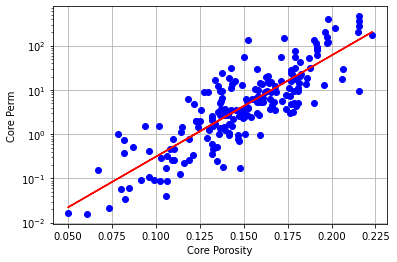

In [95]:
fig, ax = plt.subplots()

ax.semilogy(df['porosity'], df['permeability'], 'bo')
ax.semilogy(df['porosity'], 10**(results.params[1] * df['porosity'] + results.params[0]), 'r-')

ax.grid(True)
ax.set_ylabel('Core Perm')
ax.set_xlabel('Core Porosity')

Permeability and porosity dont have a linear relationship however, log(perm) and porosity migght have a linear relationship

## Statistical Assumptions: Homogeneity of variance.

- Assumption when the population variances (i.e., the distribution, or “spread,” of scores around the mean) of two or more samples are considered equal. In other words: the variance among the groups should be approximately equal.

- also called "homoskedasticity".
- can be tested using tests such as Levene’s test or the Brown-Forsythe Test.
- In general, with violations of homogeneity, the analysis is considered robust if you have equal-sized groups. 

In [96]:
import scipy.stats as stats
stat, p = stats.levene(Shale_por,Sand_por)

print('Levene Statistic =', stat)
print('Levene p-value =', p)

Levene Statistic = 0.3741577667130725
Levene p-value = 0.5414483059084501


Levene's Test for Homogeneity of Variance is NOT statiscally significany suggesting that the variance are similar. 
Hence, we can conclude that groups have equal variances (Homogenous)

## Statistical Assumptions: Normally Distributed Residuals

- This assumptions pertain to the residuals (error terms) and not the variables themselves.
\begin{equation}
residual = value_{observed} - value_{predicted}
\end{equation}
- can be tested using same methods for normality assumption testing. (Q-Q plot test and Shapiro Wilk test)

In [97]:
### Normality Assumption check

ANOVA_perm_por=ols('porosity ~ permeability', data=df).fit()
w, p = stats.shapiro(ANOVA_perm_por.resid)
print(w, p)

0.9696393609046936 0.0002548269694671035


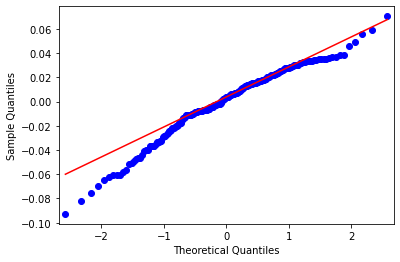

In [98]:
qqplot(ANOVA_perm_por.resid,line='q')
plt.show()

Shapiro Wilk's Test is statistically significant suggesting that there is a significant departure from normality in the residulas.

In [ ]:
## Statistical Assumptions: 

### Plot the Nonparametric CDF

Let's demonstrate plotting a nonparametric cumulative distribution function (CDF) in Python

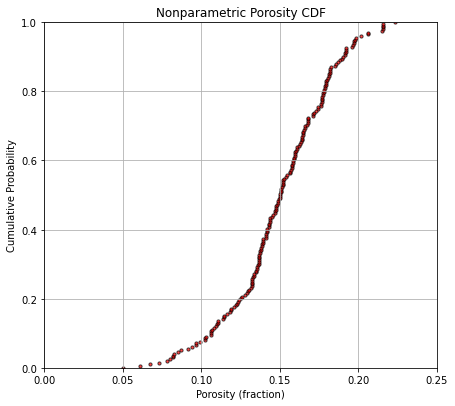

In [99]:
# sort the data:
por_sort = np.sort(por)

# calculate the cumulative probabilities assuming known tails
p = np.arange(len(por)) / (len(por) - 1)

# plot the cumulative probabilities vs. the sorted porosity values
plt.subplot(121)
plt.scatter(por_sort, p, c = 'red', edgecolors = 'black', s = 10, alpha = 0.7)
plt.xlabel('Porosity (fraction)'); plt.ylabel('Cumulative Probability'); plt.grid(); 
plt.title('Nonparametric Porosity CDF')
plt.ylim([0,1]); plt.xlim([0,0.25])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)

#### Fit a Gaussian Distribution

Let's fit a Gaussian distribution

* we get fancy with Maximuum Likelihood Estimation (MLE) for the Gaussian parametric distribution fit mean and standard deviation

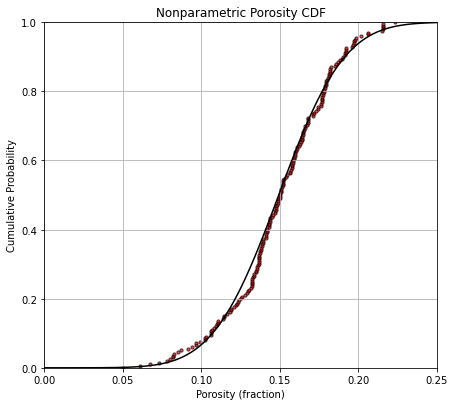

In [100]:
por_values = np.linspace(0.0,0.25,100) 
fit_mean, fit_stdev = norm.fit(por,loc = por_average, scale = por_std) # fit MLE of the distribution 
cumul_p = norm.cdf(por_values, loc = fit_mean, scale = fit_stdev)

# plot the cumulative probabilities vs. the sorted porosity values
plt.subplot(122)
plt.scatter(por_sort, p, c = 'red', edgecolors = 'black', s = 10, alpha = 0.7)
plt.plot(por_values,cumul_p, c = 'black')
plt.xlabel('Porosity (fraction)'); plt.ylabel('Cumulative Probability'); plt.grid(); 
plt.title('Nonparametric Porosity CDF')
plt.ylim([0,1]); plt.xlim([0,0.25])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)